<a href="https://colab.research.google.com/github/DOLLARDEV05/AI-LAB/blob/main/Attention%20is%20All%20You%20Need/Transformer/transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
print("let's begin working on understanding building a transformer from scratch!"
" using the help of our beloved CHATGPT! ")

let's begin working on understanding building a transformer from scratch! using the help of our beloved CHATGPT! 


let's first learn about #Dot #Product via a manual dot product!of 2 vectors!


In [3]:
vector_1  = [1,3,5]
vector_2 = [3,5,6]
temp_number = 0

if len(vector_1)==len(vector_2):
  for numbers in range(len(vector_1)):
    temp_number = temp_number + (vector_1[numbers] * vector_2[numbers])
print(f"the dot product is {temp_number}!")

# well somehow this is correct!

the dot product is 48!


dot product using numpy!

In [4]:
import numpy as np
a=np.array((1,3,5))
b=np.array((3,5,6))

c=a*b
print(f"this is the product {c}")
# this one is just array element multiplications !

d=a.dot(b)
print(f"this is actual dot product {d} and that was not")

this is the product [ 3 15 30]
this is actual dot product 48 and that was not


Let's do cross product of two vectors !

a = [1,2,3]
b = [4,5,6]

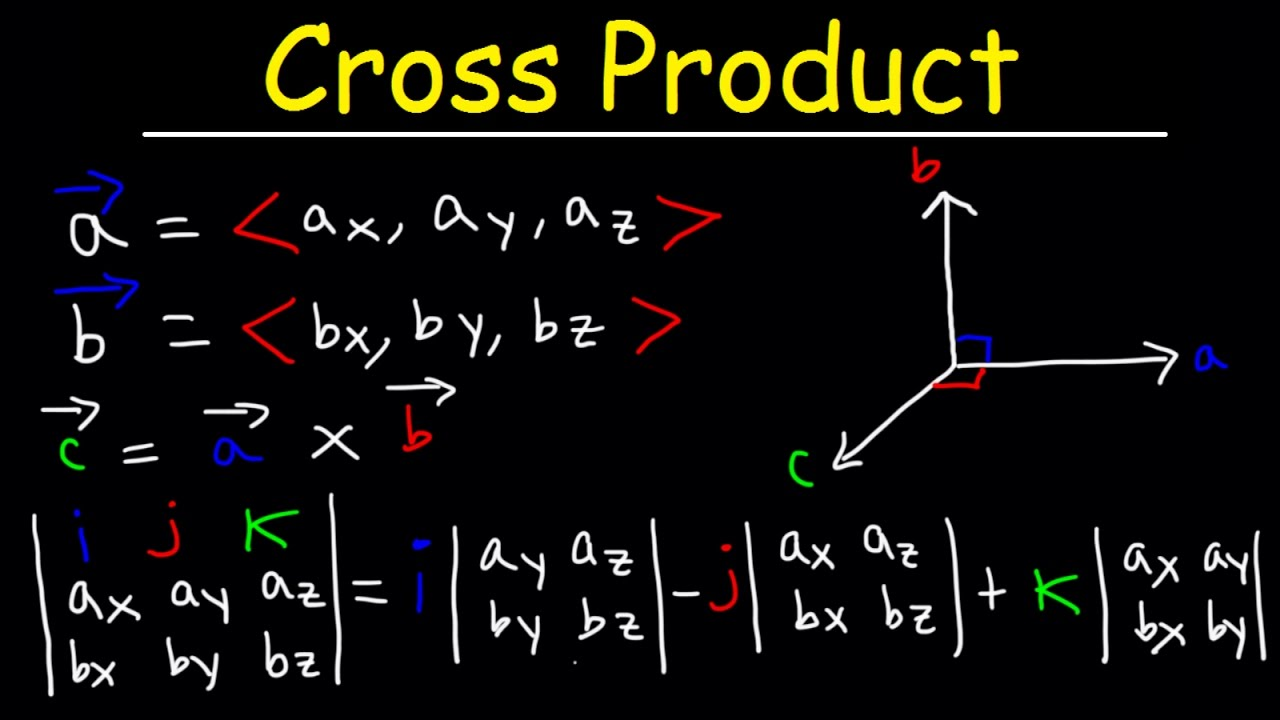

i(ay*bz - az*by) -j(ax*bz -az*bx) +k(ax*by - bx*ay)


In [5]:
a = [1,2,3]
b = [4,5,6]

cx = (a[1]*b[2]-a[2]*b[1])
cy = (a[0]*b[2]-a[2]*b[0])
cz = (a[0]*b[1]-a[1]*b[0])

print(f"vector c is {cx}i {-cy}j {cz}k")



vector c is -3i 6j -3k


In [6]:
a = [1,2,3]
b = [4,5,6]

cx = (a[1]*b[2]-a[2]*b[1])
cy = (a[2]*b[0]-a[0]*b[2])
cz = (a[0]*b[1]-a[1]*b[0])

print(f"vector c is {cx}i {cy}j {cz}k")
# this order is according to gpt as you can see that
# the order of multiplication is reversed in the y coordinate det!

vector c is -3i 6j -3k


now let's do the cross multiplication using numpy and see !

In [7]:
import numpy as np

a= np.array((1,2,3))
b = np.array((4,5,6))

cross_prod = np.cross(a,b)
print(f"this the cross product ! {cross_prod}")
# shit i just did a cross product using numpy!!!

this the cross product ! [-3  6 -3]


manual matrix multiplication for mxn * nxp matrix (wihtout numpy)

In [8]:
# how to check whether the cols of first is same as the rows of second ?

a = [[1,2,3],
     [4,5,6]
]

b = [[7,8],
     [9,10],
     [11,12]
]
for i in range(len(a)):
  for j in range(len(b[0])):
    temp = 0
    for k in range(len(a[0])):
      temp += a[i][k]*b[k][j]
    print(temp)
    print("---------")

# so we are fixing row for one and column for the other

58
---------
64
---------
139
---------
154
---------


In [9]:
import numpy as np

a = [[1,2,3],
     [4,5,6]
]

b = [[7,8],
     [9,10],
     [11,12]
]

c = np.dot(a,b)
print(c)

# better to convert list into arrays before using np operations using np.array(a)
# other wise some functionalities might not work fine! np.dot() work fine for
# the reason that it converts it automatically but @ needs to have np.arrays

[[ 58  64]
 [139 154]]


In [10]:
import numpy as np

a = [[1,2,3],
     [4,5,6]
]

b = [[7,8],
     [9,10],
     [11,12]
]

c = np.array(a) @ np.array(b)
print(c)

[[ 58  64]
 [139 154]]


lets work on vectors and matrices in 3d (3rd rank tensors), by solving easy problems

In [11]:
import numpy as np

# Create a 3D tensor with shape (2, 3, 4)
# Think of it as: 2 matrices, each of size 3x4
tensor = np.arange(24).reshape(2, 3, 4)
print("Tensor:\n", tensor)
# arange genrates random numbered 1d tensor we then reshape it using reshape(2,3,4)
# so 2 is the depth like 2d arrays ! and then 3 rows in each and 4 cols in each

# 1. Get the shape of the tensor.
# 2. Access the element in the first matrix (index 0), second row (index 1), third column (index 2).
# 3. Extract the second matrix entirely.


Tensor:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [12]:
print(tensor.shape)
# here the first number states the number of arrays inside an the second states
# number of rows inside each matrices and then the 3rd num  = number of columns!

(2, 3, 4)


In [13]:
print(tensor[0,0,0])
print(tensor[0,1,0])
print(tensor[0,0,2])

0
4
2


In [14]:
# Q. Here are your 4 practice problems again with your tensor = np.arange(24).reshape(2, 3, 4):

# Extract the entire first matrix.

# Extract the third row of the second matrix.

# Extract the last column of all matrices.

# Change the element at position [1, 2, 3] to 999, then print the updated tensor.

In [22]:
tensor = np.arange(24).reshape(2,3,4)

print(tensor)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [23]:
# extract entire first matrix.
for i in range(len(tensor[0])):
  for j in range(len(tensor[0,0])):
    print(tensor[0,i,j])

# iterating over the first matrix as it is ! (maybe not the best way but gets
# the work done)

0
1
2
3
4
5
6
7
8
9
10
11


In [24]:
# Extract the third row of the second matrix.
print(tensor[1,2])

[20 21 22 23]


In [25]:
# Extract the last column of all matrices.
for i in range(len(tensor)):
  for j in range(len(tensor[0])):
      print(tensor[i,j,3])

3
7
11
15
19
23


In [26]:
# Change the element at position [1, 2, 3] to 999, then print the updated tensor.
tensor[0,0,1] = 999
tensor[0,0,2] = 999
tensor[0,0,3] = 999

print(tensor)

[[[  0 999 999 999]
  [  4   5   6   7]
  [  8   9  10  11]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]]


In [30]:
# you did a few blunders

# to print the whole first matrix
print(tensor[0],"\n\n")

# to only print the third column of each matrices rows!
print(tensor[:,:,3],"\n\n")

# and you thought this is the index for 3 elements but this a single one
#  [1,2,3] [depth,row,column]

tensor[1,2,3] = 100
print(tensor)

[[  0 999 999 999]
 [  4   5   6   7]
 [  8   9  10  11]] 


[[999   7  11]
 [ 15  19 100]] 


[[[  0 999 999 999]
  [  4   5   6   7]
  [  8   9  10  11]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22 100]]]


Let's do the Trapose of a matrix.

interchanging whole rows to cols.


In [32]:
a = [[1,2,3],
     [4,5,6]]
b = [[0,0],
     [0,0],
     [0,0]]

for i in range(len(a)):
  for j in range(len(a[0])):
    b[j][i]=a[i][j]

print(b)

# oh no i did it !

[[1, 4], [2, 5], [3, 6]]


let's make a zero filled b matrix using list comprehension and also using numpy.zero